## Create and use APIs in Python

##### Author: Kliz John Andrei Millares

![Kliz Logo](https://i.postimg.cc/FKfVkbnz/Millares-Logo01.png)

# **1. Bitcoin API Practice**

- Download the need package

In [18]:
!pip install pycoingecko

### Import the libraries

In [11]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

<p style="font-size: 24px; color: #118ab2;"><b>Prepare the Data</b></p> 

In [12]:
bitcoin_data = cg.get_coin_market_chart_by_id(id = 'bitcoin', vs_currency = 'usd', days=30)

<p style="font-size: 24px; color: #06d6a0;"><b>Process the Data</b></p> 

In [15]:
data = pd.DataFrame(bitcoin_data['prices'], columns = ['TimeStamp','Price'])
data['Date'] = pd.to_datetime(data['TimeStamp'], unit = 'ms')
candlestick_data = data.groupby(data.Date.dt.date).agg({'Price': ['min', 'max', 'first', 'last']})

<p style="font-size: 24px; color: #ef476f;"><b>I will create a DataViz for Candlestick of Bitcoin</b></p> 

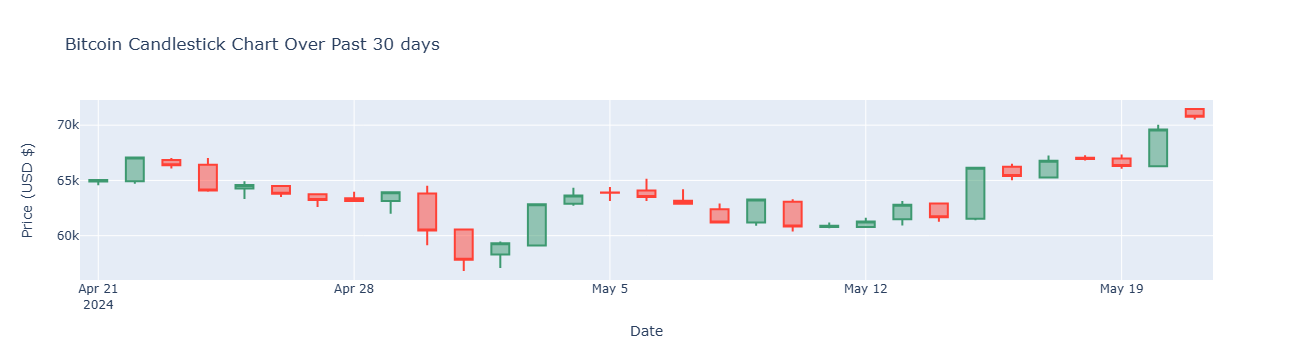

In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=candlestick_data.index,
                                     open=candlestick_data['Price']['first'],
                                     high=candlestick_data['Price']['max'],
                                     low=candlestick_data['Price']['min'],
                                     close=candlestick_data['Price']['last'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False,
                  xaxis_title='Date',
                  yaxis_title='Price (USD $)',
                  title='Bitcoin Candlestick Chart Over Past 30 days')

fig.show()


# **2. NBA API Practice**

- Download the need package

In [22]:
!pip install nba_api

### Import the libraries

In [23]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [24]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

The method <code>get_teams()</code> returns a list of dictionaries.

In [28]:
nba_teams = teams.get_teams()

In [29]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

## Let's view it in readble form

In [31]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


## I will look for GSW Warriors

In [33]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


I can use the following line of code to access the first column of the DataFrame:


In [34]:
id_warriors=df_warriors[['id']].values[0][0]
# I now have an integer that can be used to request the Warriors information 
id_warriors

1610612744

The function "League Game Finder " will make an API call, it's in the module <code>stats.endpoints</code>.


In [35]:
from nba_api.stats.endpoints import leaguegamefinder

I can download the dataframe from the API call for Golden State and run the rest like a video.


In [36]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")


In [37]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


I can create two dataframes, one for the games that the Warriors faced the raptors at home, and the second for away games.


In [38]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

I can calculate the mean for the column <code>PLUS_MINUS</code> for the dataframes <code>games_home</code> and <code> games_away</code>:


In [39]:
games_home['PLUS_MINUS'].mean()

3.730769230769231

In [40]:
games_away['PLUS_MINUS'].mean()

-0.6071428571428571

<p style="font-size: 24px; color: #ef476f;"><b>Let's Visualize it</b></p> 

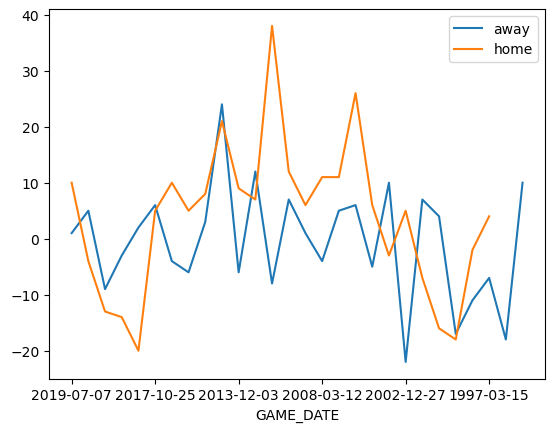

In [41]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

# **3. GDP Data extraction and processing Practice**

## Project Scenario:

An international firm that is looking to expand its business in different countries across the world has recruited me <b>(Kliz Andrei)</b>. I have been hired as a junior Data Engineer and are tasked with creating a script that can extract the list of the top 10 largest economies of the world in descending order of their GDPs in Billion USD (rounded to 2 decimal places), as logged by the International Monetary Fund (IMF). 

The required data seems to be available on the URL mentioned below:


URL: https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29


## Objectives

My tasks is:

 - Use Webscraping to extract required information from a website.
 - Use Pandas to load and process the tabular data as a dataframe.
 - Use Numpy to manipulate the information contatined in the dataframe.
 - Load the updated dataframe to CSV file.


### Importing Required Libraries


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Extract tables from webpage using Pandas

In [61]:
tables = pd.read_html("https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29")
df = tables[3]

# Replace the column headers with column numbers
df.columns = range(df.shape[1])

# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0,2]]

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
df = df.iloc[1:11,:]

# Assign column names as "Country" and "GDP (Million USD)"
df.columns = ['Country','GDP (Million USD)']

### Modify the GDP column of the DataFrame then converting the value available in Million USD to Billion USD.

In [62]:
# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)

# Convert the GDP value in Million USD to Billion USD
df[['GDP (Million USD)']] = df[['GDP (Million USD)']]/1000

# Use numpy.round() method to round the value to 2 decimal places.
df[['GDP (Million USD)']] = np.round(df[['GDP (Million USD)']], 2)

# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df.rename(columns = {'GDP (Million USD)' : 'GDP (Billion USD)'})

,Country,GDP (Billion USD)
1,United States,26854.60
2,China,19373.59
3,Japan,4409.74
4,Germany,4308.85
5,India,3736.88
6,United Kingdom,3158.94
7,France,2923.49
8,Italy,2169.74
9,Canada,2089.67
10,Brazil,2081.24


## Load the DataFrame to the CSV file named "Largest_economies.csv"


In [63]:
df.to_csv('./Largest_economies.csv')

<p style="font-size: 24px; color: #ef476f;"><b>I will create a data viz of Top 10 Economies by GDP</b></p> 

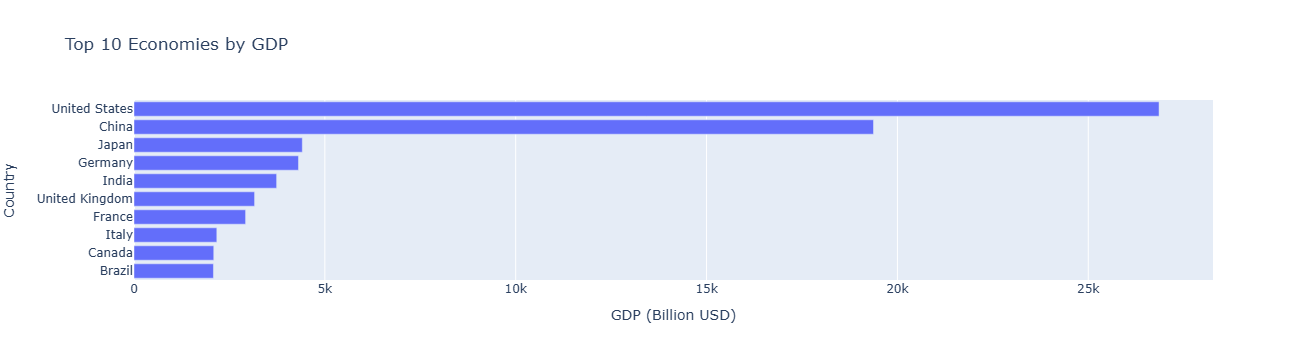

In [70]:
tables = pd.read_html("https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29")
df = tables[3]

# Replace the column headers with column numbers
df.columns = range(df.shape[1])

# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0, 2]]

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world
df = df.iloc[1:11, :]

# Assign column names as "Country" and "GDP (Million USD)"
df.columns = ['Country', 'GDP (Million USD)']

# Remove commas from the 'GDP (Million USD)' column and convert it to integers
df['GDP (Million USD)'] = df['GDP (Million USD)'].str.replace(',', '').astype(int)

# Convert the GDP value in Million USD to Billion USD
df['GDP (Billion USD)'] = df['GDP (Million USD)'] / 1000

# Use numpy.round() method to round the value to 2 decimal places
df['GDP (Billion USD)'] = np.round(df['GDP (Billion USD)'], 2)

# Plotting with Plotly
fig = px.bar(df, x='GDP (Billion USD)', y='Country', orientation='h', 
             title='Top 10 Economies by GDP', 
             labels={'GDP (Billion USD)': 'GDP (Billion USD)', 'Country': 'Country'})

fig.update_layout(xaxis_title='GDP (Billion USD)', yaxis_title='Country', yaxis=dict(autorange='reversed'))

fig.show()
